In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_excel("WOC training.xlsx")

In [3]:
data.head()

,Year,USA,China,Australia,World
0,1965,6414.477051,129.062531,200.019363,17989.603516
1,1966,6731.245117,165.799911,214.047546,19341.146484
2,1967,6988.793945,163.692841,234.387772,20732.136719
3,1968,7457.960938,179.034576,255.284988,22488.332031
4,1969,7831.837891,240.044327,262.448120,24353.000000


In [4]:
data.describe()

,Year,USA,China,Australia,World
count,41.000000,41.000000,41.000000,41.000000,41.000000
mean,1985.000000,9301.646187,1370.615776,364.393897,35066.132241
std,11.979149,1157.809296,966.514212,71.123458,7070.032967
min,1965.000000,6414.477051,129.062531,200.019363,17989.603516
25%,1975.000000,8573.317383,804.078247,330.978943,32534.806641
50%,1985.000000,9376.044922,1076.636841,362.620819,35514.421875
75%,1995.000000,10251.112305,1825.630737,427.777496,39442.175781
max,2005.000000,11214.078125,3838.487061,478.701874,46672.656250


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       41 non-null     int64  
 1   USA        41 non-null     float64
 2   China      41 non-null     float64
 3   Australia  41 non-null     float64
 4   World      41 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.7 KB


In [7]:
X=data.Year.values
y=data.World.values

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size=0.75)
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)

In [28]:
model=LinearRegression()

In [29]:
model.fit(X_train,y_train)

LinearRegression()

In [30]:
y_predicted=model.predict(X_test)

In [31]:
model.score(X_test, y_test)

0.8878107602470905

In [39]:
df=pd.read_excel("WOC testing.xlsx")

In [33]:
df.head()

,Year,USA,USA Pred,China,China Pred,Australia,Aus Pred,World,World Pred
0,2006,11070.909180,10155.576478,4116.769043,5852.742683,493.641815,452.891246,47172.609375,NaN
1,2007,11001.755859,10134.607027,4313.567383,6004.333511,506.270294,464.090184,47758.875000,NaN
2,2008,10273.695312,10113.637575,4408.091797,6155.924339,512.715942,475.289122,47338.687500,NaN
3,2009,9737.244141,10092.668124,4580.298340,6307.515167,504.140778,486.488060,46371.566406,NaN
4,2010,9891.227539,10071.698673,5214.490234,6459.105995,519.306824,497.686998,47895.074219,NaN


In [34]:
a=df.Year.values
a=a.reshape(-1,1)
b=df.World.values

In [35]:
y_pred=model.predict(a)

In [36]:
model.score(a,b)

0.1638793346793549

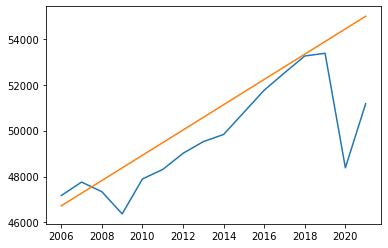

In [37]:
plt.plot(a,b)
plt.plot(a,y_pred)

In [38]:
y_pred

array([46723.99577746, 47274.49628457, 47824.99679168, 48375.4972988 ,
       48925.99780591, 49476.49831302, 50026.99882013, 50577.49932724,
       51127.99983435, 51678.50034146, 52229.00084857, 52779.50135568,
       53330.00186279, 53880.5023699 , 54431.00287701, 54981.50338413])

In [40]:
df.head()

,Year,USA,USA Pred,China,China Pred,Australia,Aus Pred,World,World Pred
0,2006,11070.909180,10155.576478,4116.769043,5852.742683,493.641815,452.891246,47172.609375,46723.995777
1,2007,11001.755859,10134.607027,4313.567383,6004.333511,506.270294,464.090184,47758.875000,47274.496285
2,2008,10273.695312,10113.637575,4408.091797,6155.924339,512.715942,475.289122,47338.687500,47824.996792
3,2009,9737.244141,10092.668124,4580.298340,6307.515167,504.140778,486.488060,46371.566406,48375.497299
4,2010,9891.227539,10071.698673,5214.490234,6459.105995,519.306824,497.686998,47895.074219,48925.997806


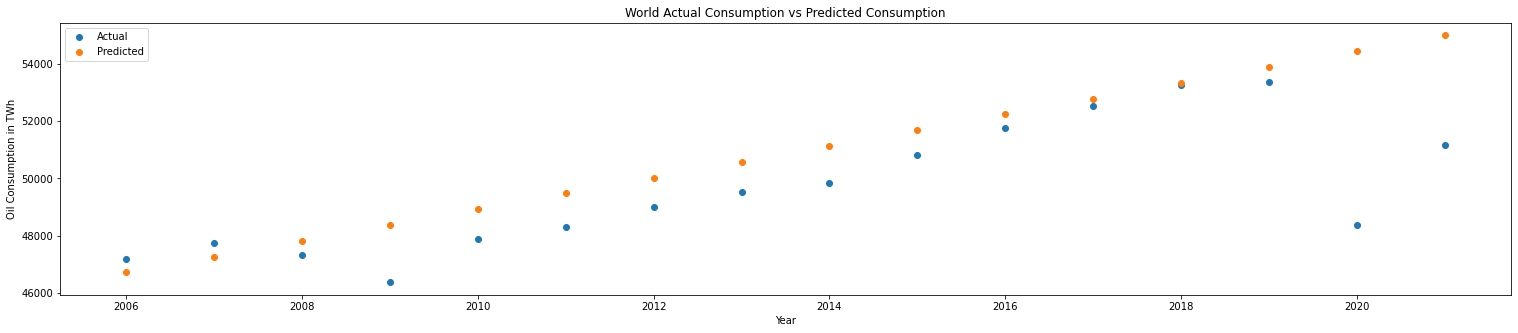

In [42]:
plt.figure(figsize=(26,5))
plt.scatter(df.Year, df.World)
plt.scatter(df.Year,df['World Pred'])
plt.xlabel("Year")
plt.ylabel("Oil Consumption in TWh")
plt.title("World Actual Consumption vs Predicted Consumption")
plt.legend(["Actual",'Predicted'], loc=0)